In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [8]:
from google.colab import files
uploaded = files.upload()


Saving Height-Width.xlsx to Height-Width.xlsx


In [10]:
df = pd.read_excel('Height-Width.xlsx')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [11]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [12]:
df[5:11]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926


In [15]:
df['Height'].head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [17]:
df.Weight[5:11]

,Weight
5,152.212156
6,183.927889
7,167.971111
8,175.929440
9,156.399676
10,186.604926


In [14]:
df.mean()

,0
Height,69.024411
Weight,186.891258


In [18]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [20]:
row,col=df.shape
print(row,col)

3501 2


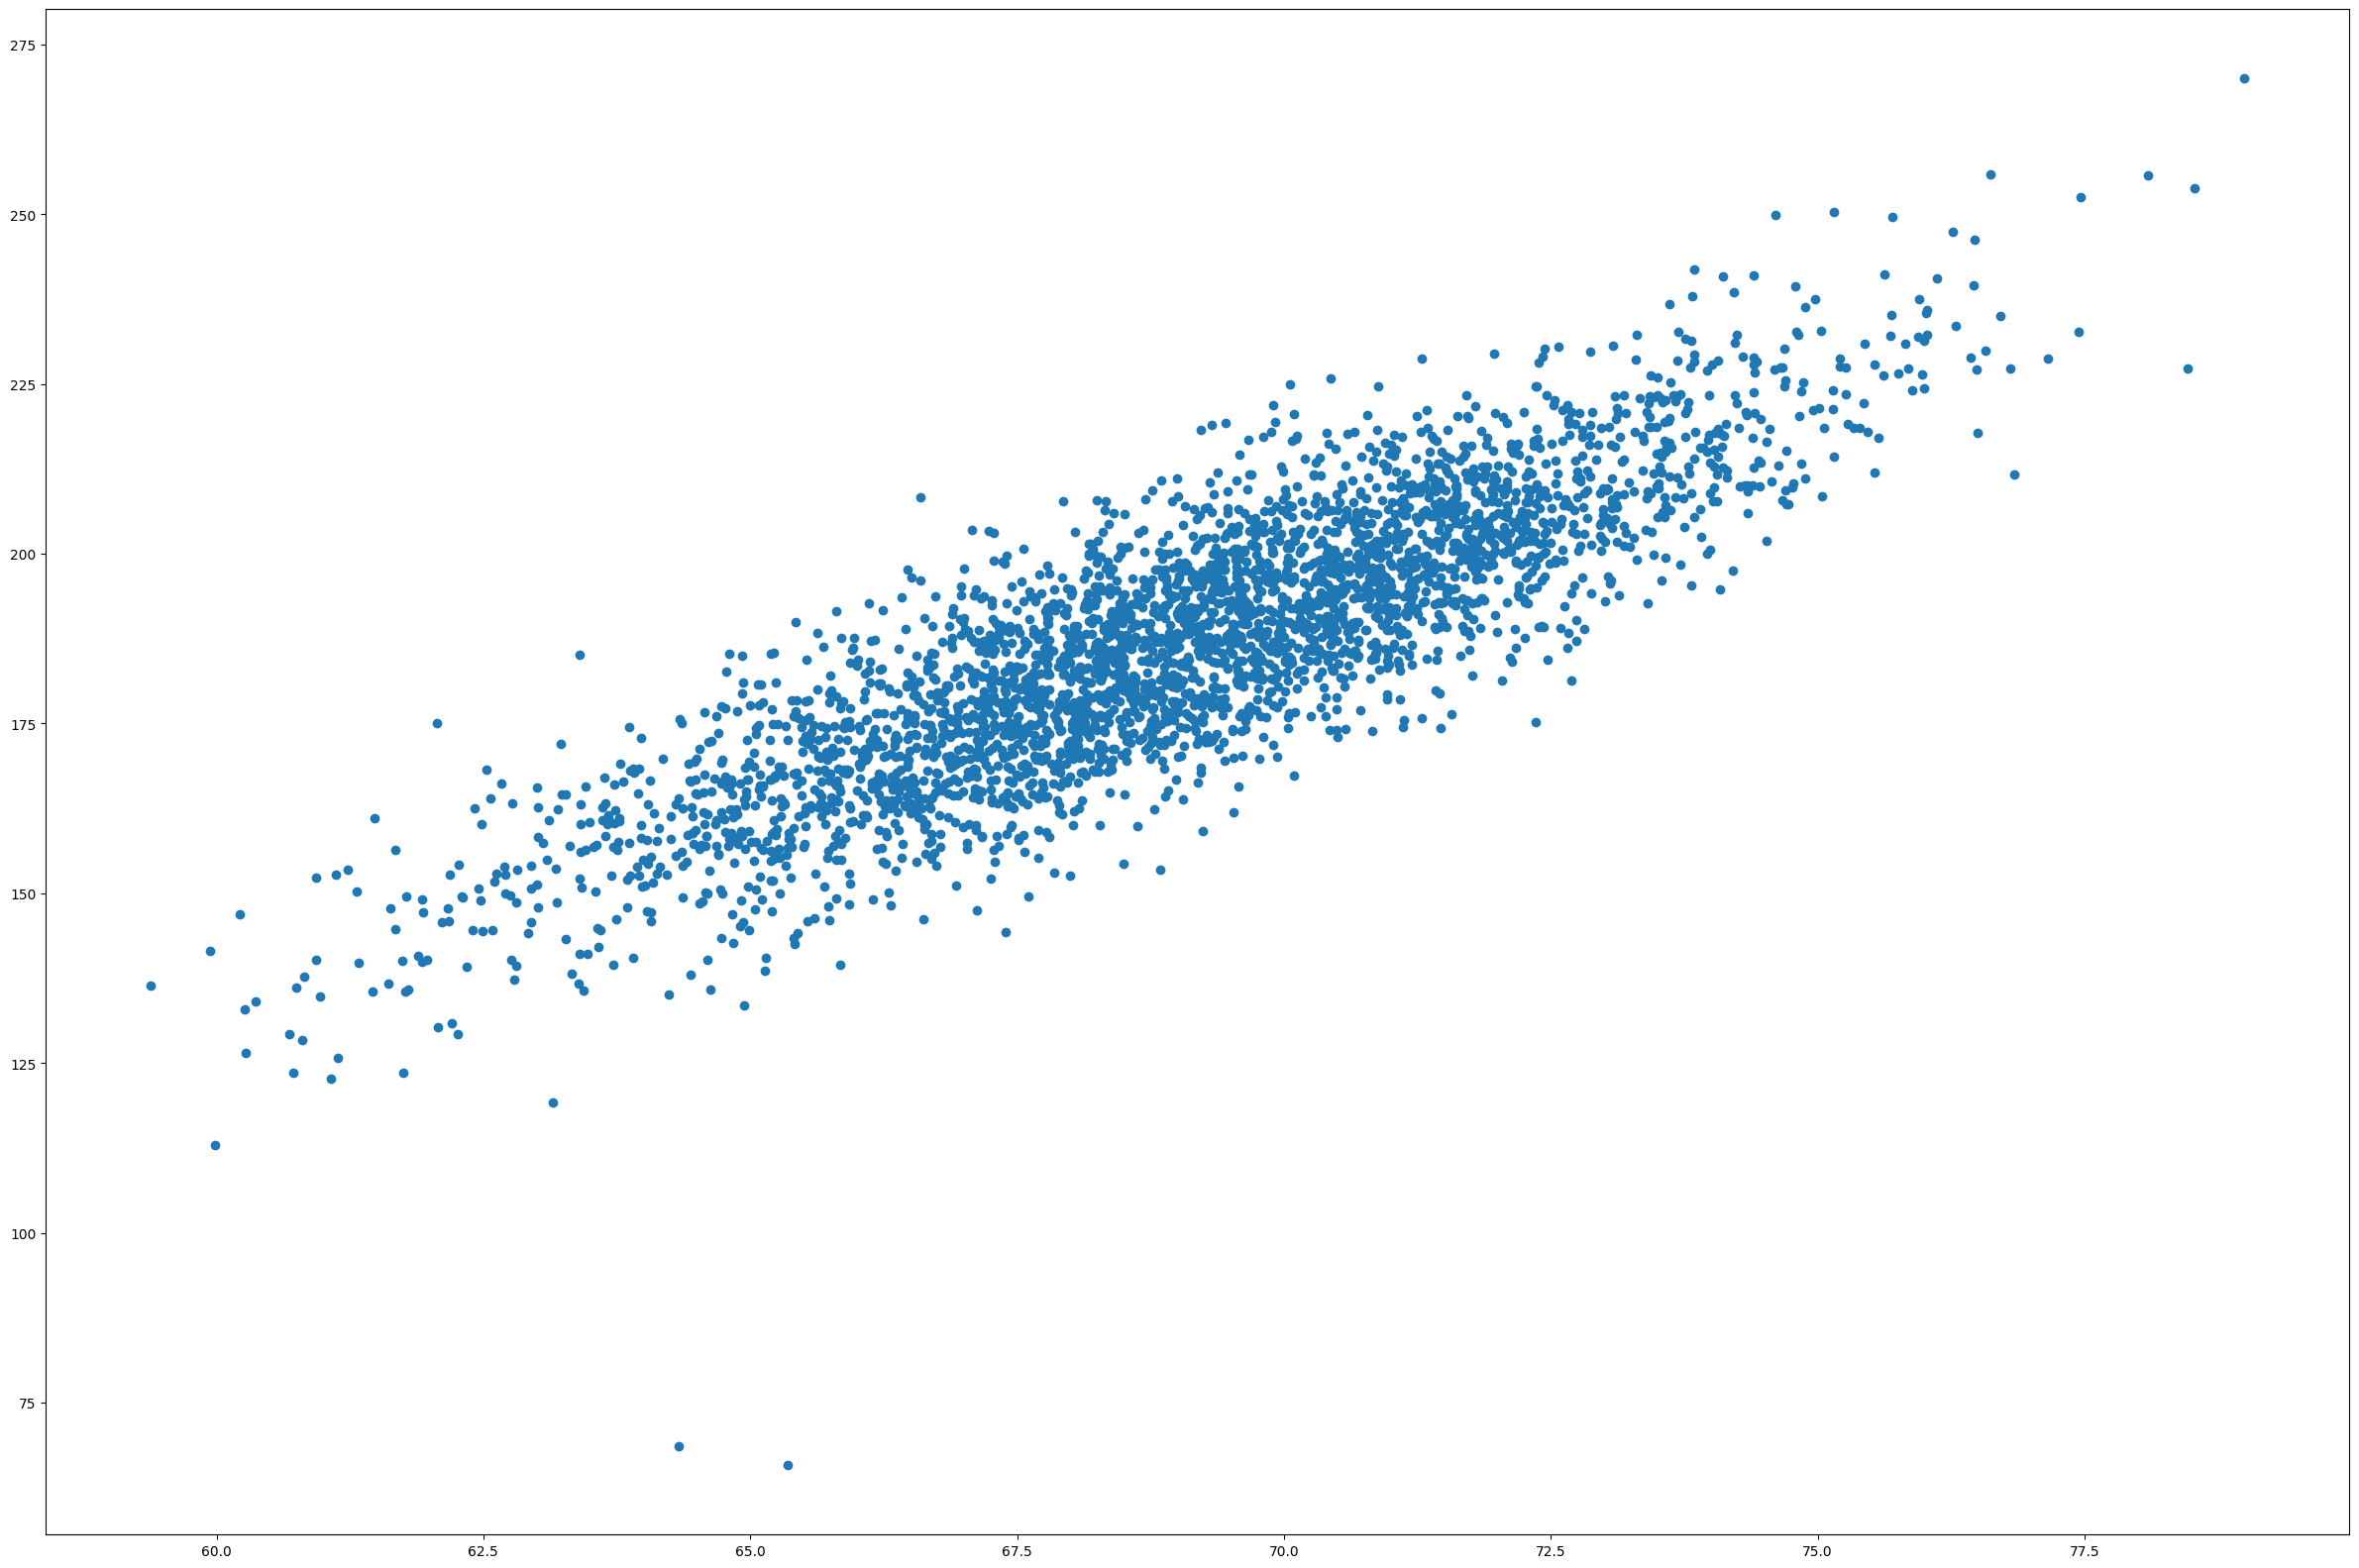

In [62]:
plt.figure(figsize=(30,20))
x=df[['Height']]
y=df['Weight']
plt.scatter(x,y)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [64]:
x_train.head()


,Height
1374,75.155410
231,71.968306
1769,69.963912
1812,66.475562
2658,72.731788


In [65]:
y_train.head()

,Weight
1374,214.370580
231,201.528177
1769,191.065448
1812,197.646409
2658,213.683943


# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [67]:
m=reg.coef_   #y = mx + c
print(m)

[5.95092905]


In [68]:
c=reg.intercept_
print(c)

-224.00779357167536


In [69]:
y=m*3000+c
y

array([17628.77936792])

In [78]:
reg.predict([[3000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17628.77936792])

In [88]:
pred=reg.predict(x_test)
pred

array([194.48982488, 176.32081659, 187.45296731, ..., 150.95895523,
       176.85907182, 179.03051912])

In [95]:
df["predicted weight"]=reg.predict(x)
df.head(16)

,Height,Weight,predicted weight
0,73.847017,241.893563,215.450566
1,68.781904,162.310473,185.308438
2,74.110105,212.740856,217.016186
3,71.730978,220.042470,202.858170
4,69.881796,206.349801,191.853816
5,67.253016,152.212156,176.210131
6,68.785081,183.927889,185.327345
7,68.348516,167.971111,182.729373
8,67.018950,175.929440,174.817221
9,63.456494,156.399676,153.617300


# Using Cost Function


In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [91]:
print(len(y_test), len(pred))

1051 1051


In [96]:
mae=mean_absolute_error(y_test,pred)
mae

8.221025004936374

In [93]:
mse=mean_squared_error(y_test,pred)
mse

102.76672319484601

# Best Fit Line

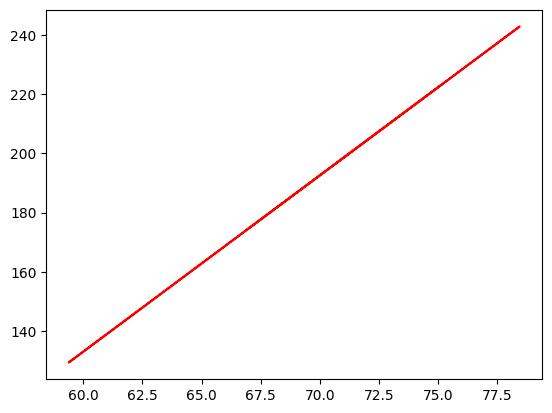

In [102]:
plt.plot(x_train,reg.predict(x_train),color='red')



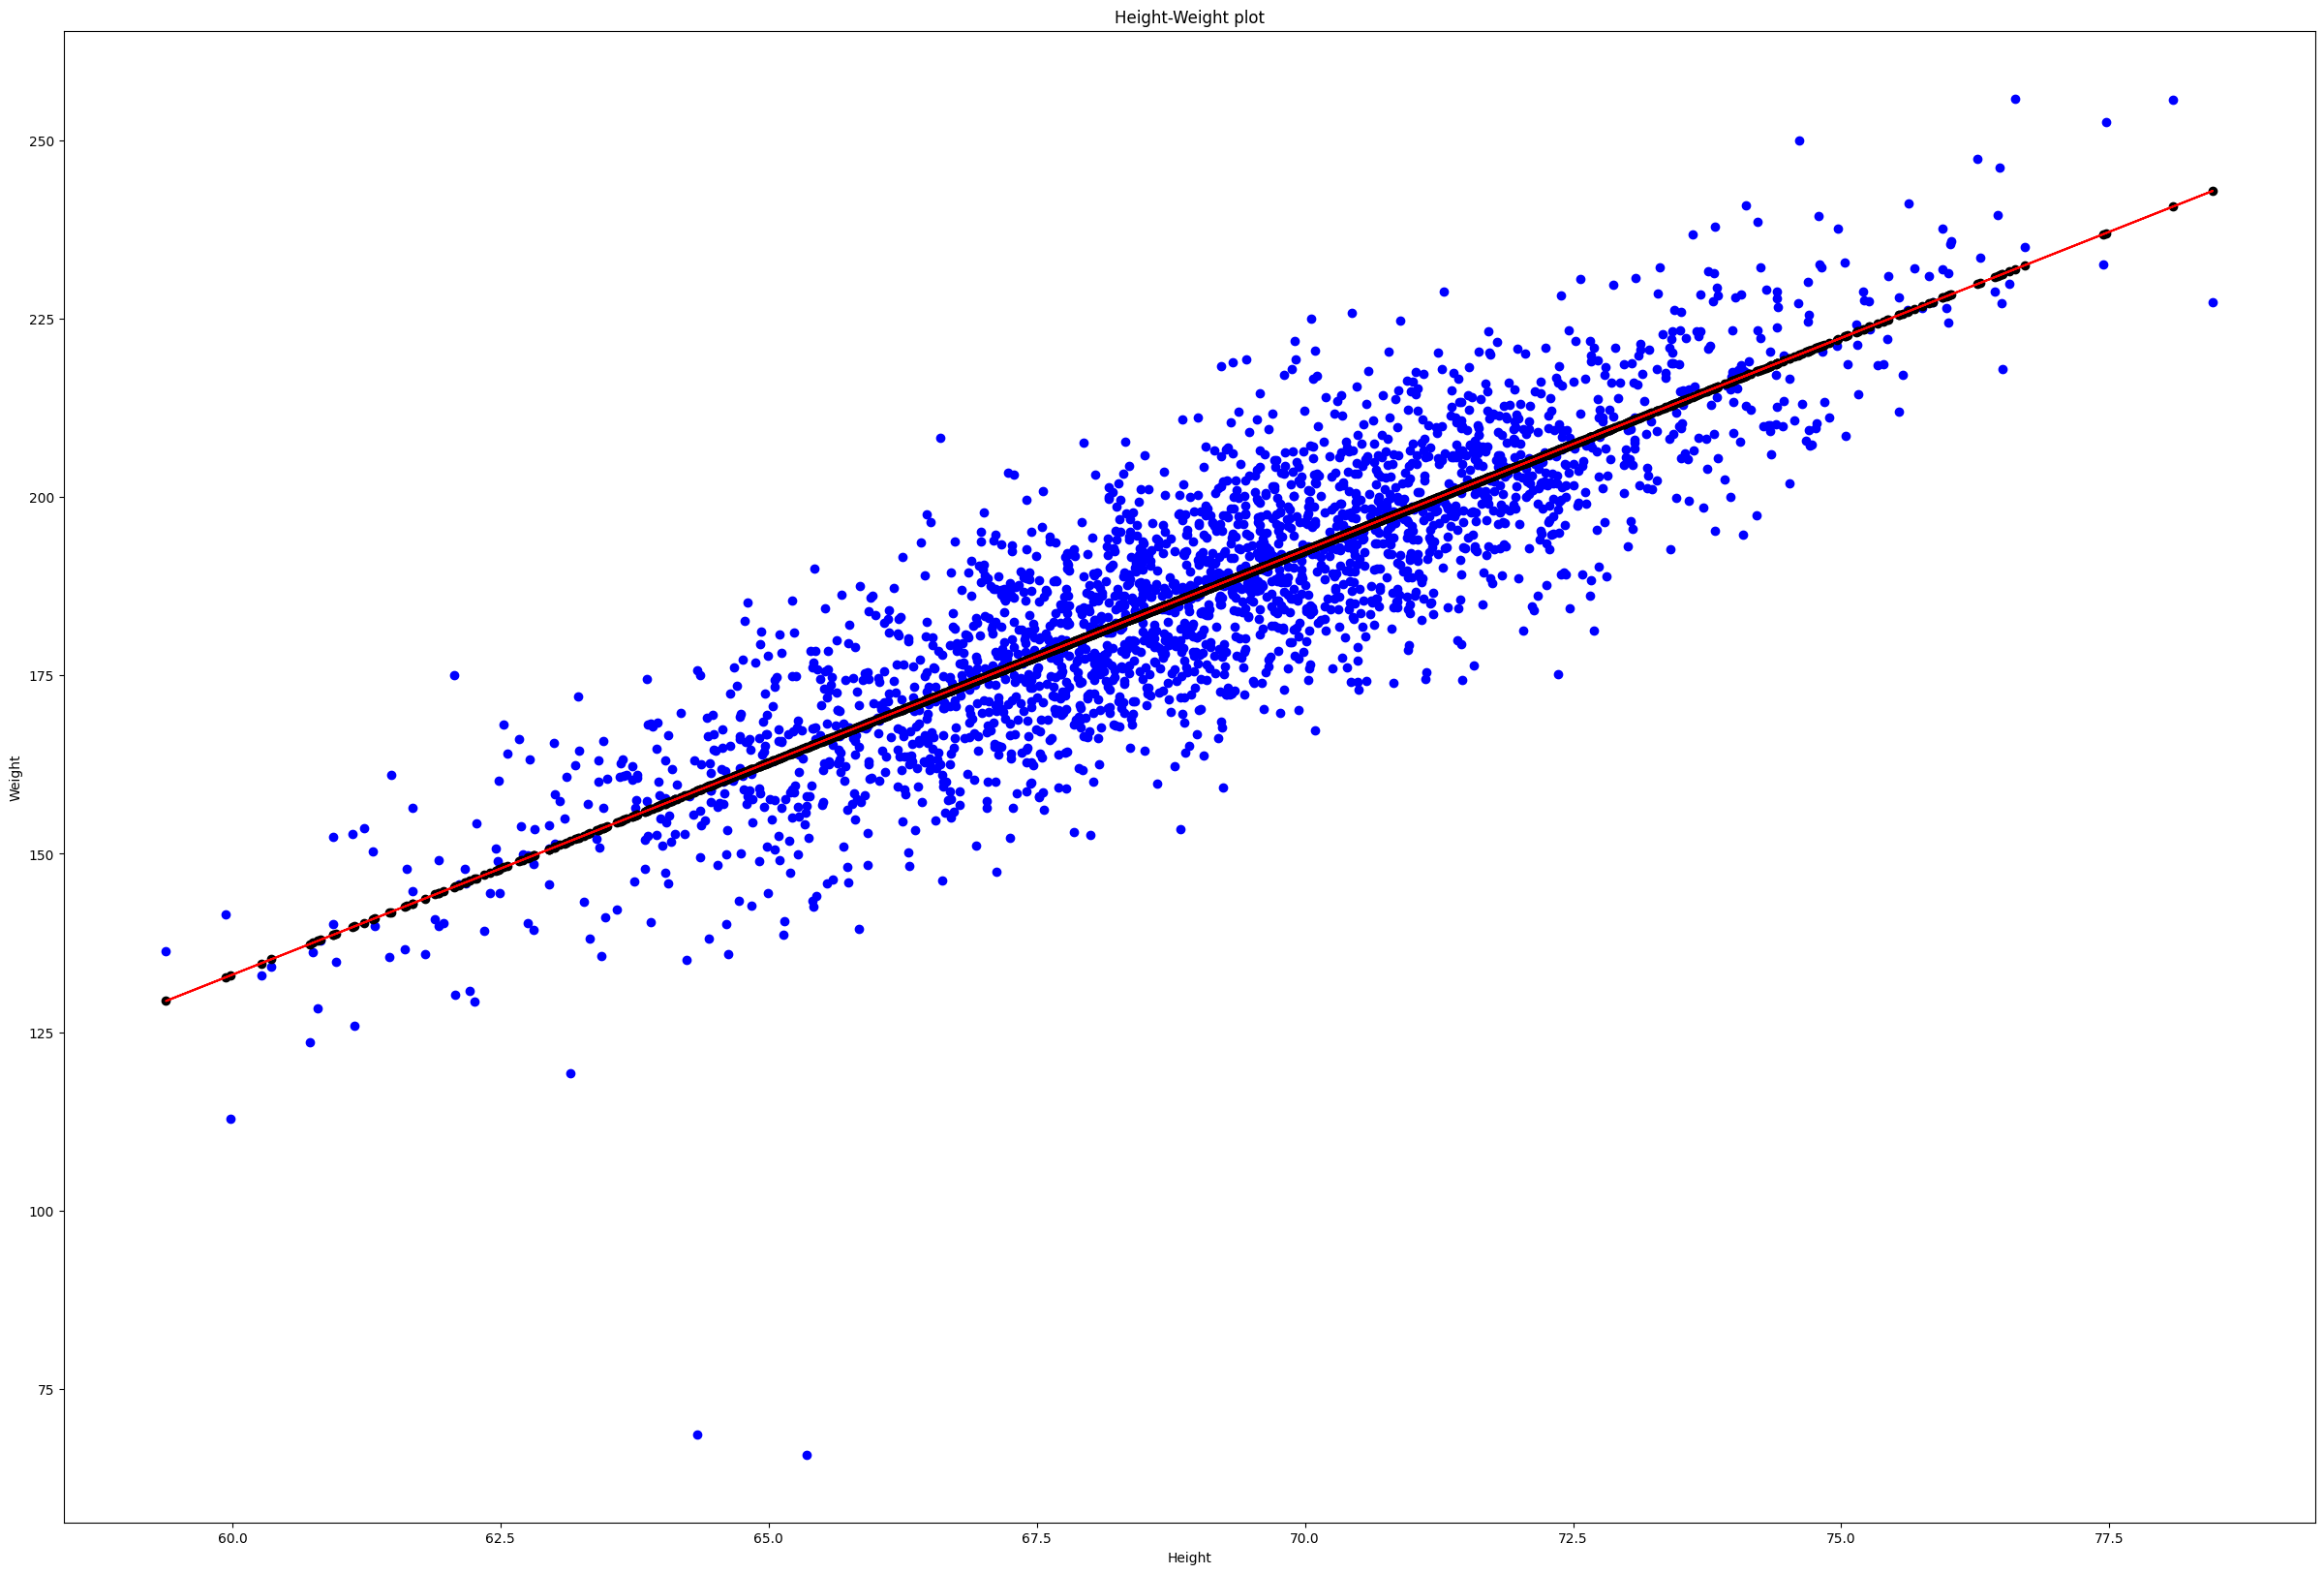

In [107]:
plt.figure(figsize=(30,20))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight plot')
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,reg.predict(x_train),color='red')
plt.scatter(x_train,reg.predict(x_train),color='black')
plt.show()

In [108]:
#Accuracy

from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7331110657899205

In [113]:
x_test.to_csv('x_test.csv')
len(x_test)

1051

# Save Model

In [115]:
#pickle
import pickle as pk
#joblib
import joblib as jb


In [116]:
pk.dump(reg,open('model_Save_Using_Pickle','wb'))

In [117]:
reg2=pk.load(open('model_Save_Using_Pickle','rb'))
reg2.predict([[3000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17628.77936792])

In [119]:
#import warnings
#warnings.filterwarnings('ignore')

In [118]:
jb.dump(reg,'model_Save_Using_Joblib')

['model_Save_Using_Joblib']